# MOVIE RECOMMENDATION SYSTEM USING COLLABORATIVE FILTER

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.io import loadmat

In [2]:
data = loadmat('ex8_movies')
Y = data['Y']
print(f'The number of movies are {Y.shape[0]}.')
print(f'The number of users are {Y.shape[1]}.')

R = data['R']
print('\nR matrix gives the data whether a user has rated the movie or not. It is a binary matrix.\nIf R(i,j) = 1, \
then movie "i" has been rated by user "j".')

The number of movies are 1682.
The number of users are 943.

R matrix gives the data whether a user has rated the movie or not. It is a binary matrix.
If R(i,j) = 1, then movie "i" has been rated by user "j".


## 1. Visualisation

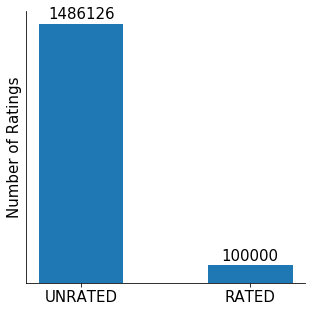

In [3]:
m,n = R.shape
count_0 = 0
count_1 = 0
for i in range(m):
    for j in range(n):
        if R[i,j] == 1:
            count_1 += 1
        else:
            count_0 += 1

R_val = np.array([0,1])
R_dat = np.array([count_0, count_1])

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.set_xticks(R_val)
ax.set_xticklabels(['UNRATED','RATED'], size=15)
ax.set_ylabel('Number of Ratings', fontsize=15)
ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt_obj = ax.bar(x = R_val, height = R_dat, width = 0.5)
for i,j in enumerate(plt_obj):
    ax.text(x=j.get_x() + j.get_width()/2, y=j.get_height()+30000, s=R_dat[i], ha='center', fontsize = 15)
    
plt.show()

### Mean Calculation
<blockquote>Any user would not have rated all of the movies. This means eavery movie row will have some missing data. Thus, it will be important to assign an average rating to those movies for which the user has not rated.<br><br>
    Note: The mean (average) for each movie will be taken from only rated values i.e. for the mean calculation, the rating for a certain movie given by any of the users has to be greater than zero.<br><br>
    Standardisation is not required as the data already lies within a range (Movies are rated between 0 and 5).

In [4]:
def filter_mean(matrix):
    m,n = matrix.shape
    avg = np.zeros([m,1])
    
    for i in range(m):
        add = 0
        count = 0
        for j in range(n):
            if matrix[i,j] > 0:
                add += matrix[i,j]
                count += 1
        avg[i] = add/count
    
    return avg

mov_avg = filter_mean(Y)
print(f'The average rating for the first movie is {mov_avg[0][0].round(3)} (Rating range is between 0 to 5)')


The average rating for the first movie is 3.878 (Rating range is between 0 to 5)


## 2. Cost Function and Gradient 

In [5]:
data_prm = loadmat('ex8_movieParams')
X = data_prm['X']
theta = data_prm['Theta']
print(f'The total number of features for the movies are {X.shape[1]}.')
print(f'The total number of parameters for the users are {theta.shape[1]}.')

The total number of features for the movies are 10.
The total number of parameters for the users are 10.


### Function Definition
<blockquote>
    • Interactions between X, Y and $\theta$ are the usual DOT PRODUCTS [.dot()] with proper shape arrangements whose sequence follows the formulae outlined below. As usual, the shape of product matrix is different from that of the input matrices.<br><br>
    • The binary matrix R has to be multiplied as a regular product (*) which means post-multiplication, the matrix sizes do not change.<br><br>
    • <i><b>Also note that for collaborative filtering algorithms, the bias constant feature-parameter pair ($X_0, \theta_0$) are not present.</b></i>

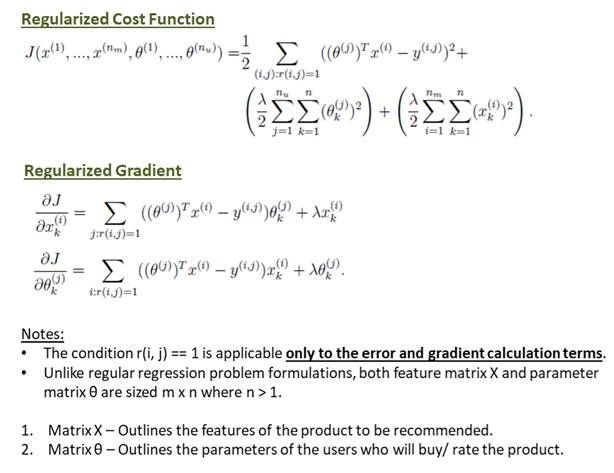

In [6]:
from IPython.display import Image
Image(filename = "D:\Python_Work\Machine_Learning\Coursera\Exercises\Recommender_Systems\Functions.jpg")

In [7]:
def cost_grad(theta, X, y, R, lmb):
    h = X.dot(theta.T)
    error = h - y
    err_filt = error * R
    
    J = (1/2) * sum(err_filt.flatten()**2)
    reg_term = (lmb/2) * (sum(theta.flatten()**2) + sum(X.flatten()**2))
    J_reg = J + reg_term
    
    X_grad = err_filt.dot(theta)
    reg_gradX = lmb * X
    X_grad_reg = X_grad + reg_gradX
    
    theta_grad = err_filt.T.dot(X)
    reg_gradth = lmb * theta
    theta_grad_reg = theta_grad + reg_gradth
    
    return J, X_grad_reg, theta_grad_reg

### Verification using Truncated Data Matrix

In [8]:
n_m = 5
n_u = 4
n = 3

Y_trim = Y[:n_m, :n_u]
R_trim = R[:n_m, :n_u]
X_trim = X[:n_m, :n]
theta_trim = theta[:n_u, :n]

print(f'The truncated example has {n_m} movies, {n_u} users and {n} features/parameters.')
J_lmb0, X_gr0, th_gr0 = cost_grad(theta_trim, X_trim, Y_trim, R_trim, lmb=0)
J_lmb1_5, X_gr1_5, th_gr1_5 = cost_grad(theta_trim, X_trim, Y_trim, R_trim, lmb=1.5)
print(f'\nFor the truncated example, cost function with lambda 0 = {J_lmb0.round(3)}.')
print(f'For the truncated example, cost function with lambda 1.5 = {J_lmb1_5.round(3)}.')
print(f'\nFor lambda 0 iteration, Movie feature gradient (X_grad) is: \n{X_gr0}.')
print(f'\nFor lambda 0 iteration, User parameter gradient (theta_grad) is: \n{th_gr0}.')


The truncated example has 5 movies, 4 users and 3 features/parameters.

For the truncated example, cost function with lambda 0 = 22.225.
For the truncated example, cost function with lambda 1.5 = 22.225.

For lambda 0 iteration, Movie feature gradient (X_grad) is: 
[[-2.52899165  7.57570308 -1.89979026]
 [-0.56819597  3.35265031 -0.52339845]
 [-0.83240713  4.91163297 -0.76677878]
 [-0.38358278  2.26333698 -0.35334048]
 [-0.80378006  4.74271842 -0.74040871]].

For lambda 0 iteration, User parameter gradient (theta_grad) is: 
[[-10.5680202    4.62776019  -7.16004443]
 [ -3.05099006   1.16441367  -3.47410789]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]].


## 3. Model Training and Parameter Learning using Collaborative Filter Method

### Master Data

In [9]:
data = loadmat('ex8_movies')
Y = data['Y']
R = data['R']
print(f'The number of movies and users are {Y.shape[0]} and {Y.shape[1]}.')

data_prm = loadmat('ex8_movieParams')
X = data_prm['X']
theta = data_prm['Theta']
print(f'The number of features for each movie is {X.shape[1]}. The number of parameters for each user is {theta.shape[1]}.')

## Movie Names
mov_list = pd.read_excel('Movie_ID.xlsx')
mov_list = mov_list['Name'].to_numpy()
print(f'\nThe first 5 movies are:\n{mov_list[:5]}.')

The number of movies and users are 1682 and 943.
The number of features for each movie is 10. The number of parameters for each user is 10.

The first 5 movies are:
['1 Toy Story (1995)' '2 GoldenEye (1995)' '3 Four Rooms (1995)'
 '4 Get Shorty (1995)' '5 Copycat (1995)'].


### New Data

In [10]:
new_ratings = np.zeros([Y.shape[0],1])
my_ratings = pd.read_csv('My_rating.csv')
my_ratings.head(2)

,Movie ID,Rating
0,0,4
1,6,3


In [11]:
new_id = my_ratings['Movie ID'].to_numpy()
new_stars = my_ratings['Rating'].to_numpy()

for i in range(len(new_id)):
    new_ratings[i] = new_stars[i]
    print(f'Rated {new_ratings[i][0]} for Movie-{mov_list[new_id[i]]}.')

R_mat = np.zeros([len(R),1])
for i in range(len(R)):
    if new_ratings[i] > 0:
        R_mat[i] = 1


Rated 4.0 for Movie-1 Toy Story (1995).
Rated 3.0 for Movie-7 Twelve Monkeys (1995).
Rated 5.0 for Movie-12 Usual Suspects, The (1995).
Rated 4.0 for Movie-54 Outbreak (1995).
Rated 5.0 for Movie-64 Shawshank Redemption, The (1994).
Rated 3.0 for Movie-66 While You Were Sleeping (1995).
Rated 5.0 for Movie-69 Forrest Gump (1994).
Rated 2.0 for Movie-98 Silence of the Lambs, The (1991).
Rated 4.0 for Movie-183 Alien (1979).
Rated 5.0 for Movie-226 Die Hard 2 (1990).
Rated 5.0 for Movie-355 Sphere (1998).


In [12]:
Y_new = np.append(Y, new_ratings, axis=1)
R_new = np.append(R, R_mat, axis=1)

print(f'Final Data Matrix:\n\nNo. of movies, n_m = {Y_new.shape[0]}\nNo. of users, n_u = {Y_new.shape[1]}\
\nAssume No. of features, n = 10')

Final Data Matrix:

No. of movies, n_m = 1682
No. of users, n_u = 944
Assume No. of features, n = 10


### Setting up the Inputs

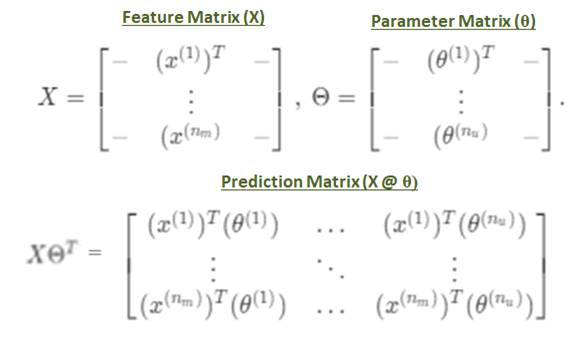

In [13]:
from IPython.display import Image
Image(filename = "D:\Python_Work\Machine_Learning\Coursera\Exercises\Recommender_Systems\Pred.jpg")

In [14]:
n_m = Y_new.shape[0]
n_u = Y_new.shape[1]
n = 10

# MEAN NORMALISATION
Y_mu = filter_mean(Y_new)
Y_norm = Y_new - Y_mu
print(f'The size of mean matrix is {Y_mu.shape}.')

# FEATURE AND PARAMETER RANDOM INITIALISATION
X_new = np.random.rand(n_m, n)
theta_new = np.random.rand(n_u, n)

The size of mean matrix is (1682, 1).


### GRADIENT DESCENT ALGORITHM

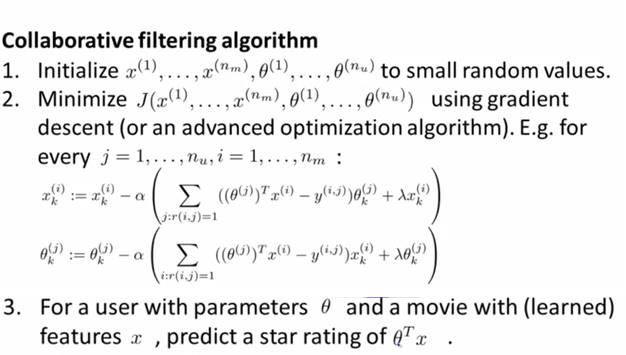

In [15]:
from IPython.display import Image
Image(filename = "D:\Python_Work\Machine_Learning\Coursera\Exercises\Recommender_Systems\Gradient_Descent.jpg")

In [16]:
def Grad_descent(theta, X, y, R, lmb, alpha, num_iter):
    J_history = []
    
    for i in range(num_iter):
        J, GX, Gtheta = cost_grad(theta, X, y, R, lmb)
        X = X - (alpha * GX)
        theta = theta - (alpha * Gtheta)
        J_history.append(J)
        
    return theta, X, J_history

In [ ]:
theta_opt_1, X_opt_1, J_his_1 = Grad_descent(theta_new, X_new, Y_norm, R_new, lmb=1, alpha=0.001, num_iter=100)
#theta_opt_2, X_opt_2, J_his_2 = Grad_descent(theta_new, X_new, Y_norm, R_new, lmb=10, alpha=0.002, num_iter=100)
theta_opt_3, X_opt_3, J_his_3 = Grad_descent(theta_new, X_new, Y_norm, R_new, lmb=100, alpha=0.002, num_iter=100)

In [ ]:
theta_opt_2, X_opt_2, J_his_2 = Grad_descent(theta_new, X_new, Y_norm, R_new, lmb=40, alpha=0.002, num_iter=100)

### Gradient Convergence

In [ ]:
print(f'The optimised feature co-efficients are given by "X_opt_2" and the optimised user parameters are given by \
"theta_opt_2".\nThe converged cost function value is {J_his_2[-1].round(3)}.')

fig, ax = plt.subplots(1,1)
ax.plot(J_his_1, label = 'alpha = 0.001, lmb=1')
ax.plot(J_his_2, label = 'alpha = 0.002, lmb=40')
ax.plot(J_his_3, label = 'alpha = 0.002, lmb=100')
ax.legend()
plt.show()

## 4. Movie Prediction

In [ ]:
X_final = X_opt_2
theta_final = theta_opt_2

pred_matrix = X_final.dot(theta_final.T)
print(f'The size of final prediction matrix for all movies and users is {pred_matrix.shape}.')

In [ ]:
idx_mat = np.array(list(range(0,n_m,1))).reshape(-1,1)
pred_user = (pred_matrix[:,900] + Y_mu[0]).reshape(-1,1)

pred_add = np.append(idx_mat, pred_user,axis=1)
pred_sort = pred_add[pred_add[:,1].argsort()[::-1]]
pred_sort[:10]

In [ ]:
print('Top 10 predictions for User\n')

for i in range(10):
    print(f'Predicted Rating = {pred_sort[i][1].round(2)}; Movie-{mov_list[int(pred_sort[i][0])]}')

### Preliminary Learning Algorithm Check

In [ ]:
pred_all = pred_matrix + Y_mu[0]
m, n = pred_all.shape
count = 0
for i in range(m):
    for j in range(n):
        if pred_all[i,j] > 5:
            count += 1
            
if count > 0:
    print('Predicted Rating above 5 present. May indicate overfitting')
else:
    print('Recommender System is Good to go')

In [ ]:
# Pending - Analytical Gradient Calculation and Comparison